In [13]:
import numpy as np 
import pandas as pd 
import sys
from pandas import Series,DataFrame

from numpy import random
from numpy.random import randn

from io import StringIO
from matplotlib.pyplot import *
from scipy import stats
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')



%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

In [ ]:
titanic_df.info()

In [ ]:
sns.factorplot('Pclass',data=titanic_df, hue = 'Sex')

In [13]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [ ]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

titanic_df[0:10]

In [ ]:
sns.factorplot('Pclass' , data=titanic_df, hue='person')

In [ ]:
titanic_df['Age'].hist(bins=70)

In [ ]:
titanic_df['person'].value_counts()

In [ ]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass' , aspect = 4)

fig.map(sns.kdeplot , 'Age' , shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim(0,oldest))

fig.add_legend()

In [ ]:
deck = titanic_df['Cabin'].dropna()

deck.head()

In [ ]:
levels = []

for level in deck:
    levels.append(level[0])
    
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.lmplot('Cabin', data=cabin_df,palette='winter_d')

In [ ]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch


titanic_df['Alone']

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [ ]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no' , 1:'yes'})

sns.lmplot('Age' , 'Survived', hue = 'Pclass',data=titanic_df , palette='winter')

In [ ]:
generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived' , hue = 'Sex', data=titanic_df, palette='winter', x_bins=generations)

In [2]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1, end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.477171,155.464622,153.457690,154.548406,153.643245,2.731294e+07
std,13.165188,13.252117,12.973074,13.087294,13.656883,1.144339e+07
min,120.930000,121.389999,120.620003,121.349998,119.429459,1.402670e+07
25%,143.915001,144.675003,143.184998,143.864998,142.440361,2.034815e+07
50%,154.000000,154.720001,153.309998,153.949997,152.840561,2.440950e+07
75%,163.775002,164.385002,163.044999,163.675003,163.088723,3.073265e+07
max,179.369995,180.100006,178.250000,179.259995,179.259995,1.119850e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-30 to 2018-01-26
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


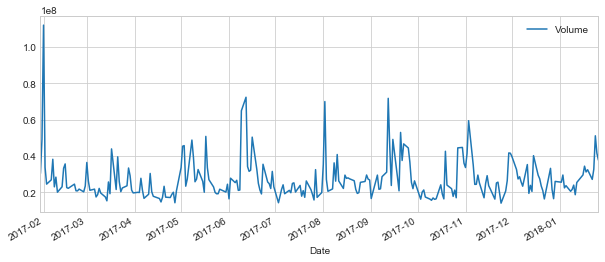

In [11]:
AAPL['Volume'].plot(legend = True , figsize = (10,4))

In [17]:
import sys

ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'] , ma).mean()

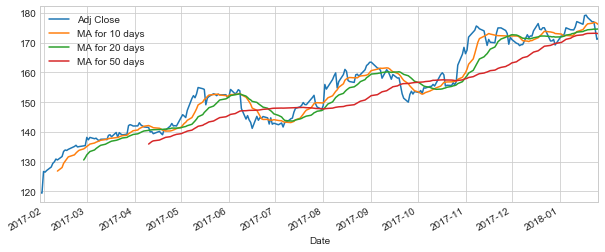

In [18]:
AAPL[['Adj Close' , 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots= False , figsize=(10,4))

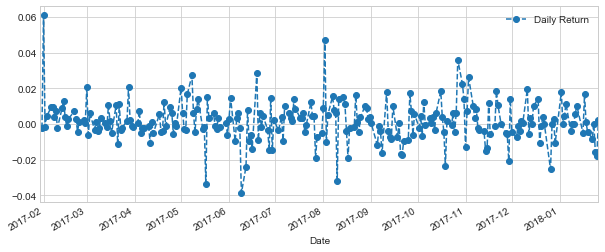

In [23]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend = True,marker='o',linestyle = '--')

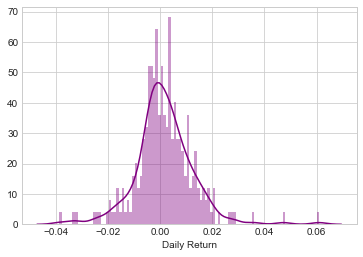

In [24]:
sns.distplot(AAPL['Daily Return'].dropna() , bins = 100 , color = 'purple')

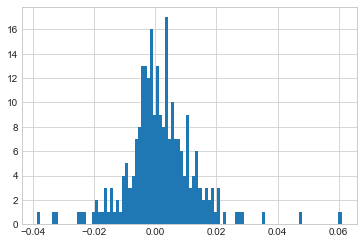

In [25]:
AAPL['Daily Return'].hist(bins = 100)

In [26]:
closing_df =DataReader(tech_list , 'yahoo', start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-26,171.509995,1402.050049,1175.839966,94.059998
2018-01-25,171.110001,1377.949951,1170.369995,92.330002
2018-01-24,174.220001,1357.510010,1164.239990,91.820000
2018-01-23,177.039993,1362.540039,1169.969971,91.900002
2018-01-22,177.000000,1327.310059,1155.810059,91.610001


In [29]:
tech_rets = closing_df.pct_change()

tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-26,NaN,NaN,NaN,NaN
2018-01-25,-0.002332,-0.017189,-0.004652,-0.018392
2018-01-24,0.018175,-0.014834,-0.005238,-0.005524
2018-01-23,0.016186,0.003705,0.004922,0.000871
2018-01-22,-0.000226,-0.025856,-0.012103,-0.003156


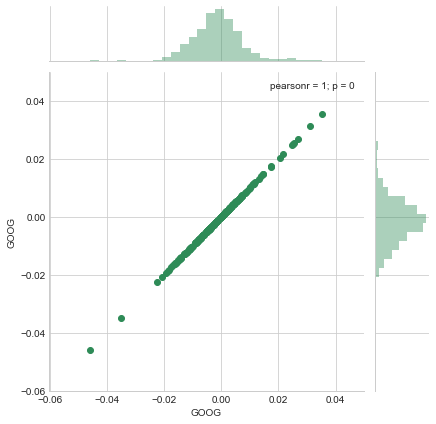

In [30]:
sns.jointplot('GOOG' ,'GOOG' ,tech_rets , kind = 'scatter' , color = 'seagreen')

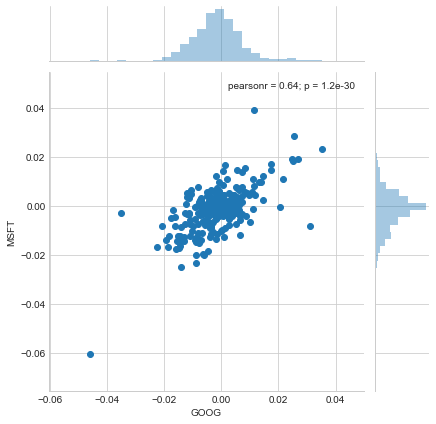

In [31]:
sns.jointplot('GOOG' , 'MSFT' ,tech_rets , kind = 'scatter')